In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from vega_datasets import data

import warnings
warnings.filterwarnings('ignore')

## sf_temps() 

In [2]:
df = data.sf_temps()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [18]:
df['month'] = df.date.dt.month

In [19]:
temps = df.set_index('date').sort_index()
temps

,temp,month
date,,
2010-01-01 00:00:00,47.8,1
2010-01-01 01:00:00,47.4,1
2010-01-01 02:00:00,46.9,1
2010-01-01 03:00:00,46.5,1
2010-01-01 04:00:00,46.0,1
...,...,...
2010-12-31 19:00:00,50.4,12
2010-12-31 20:00:00,49.9,12
2010-12-31 21:00:00,49.4,12


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [7]:
daily_temps = temps.resample('D').mean()
daily_temps

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


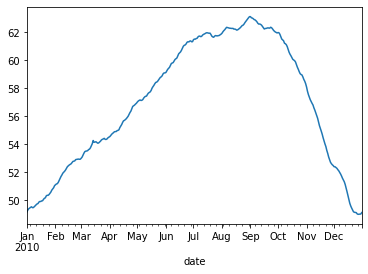

In [8]:
daily_temps.temp.plot();

### 2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
min_temps = temps.resample('D').min()

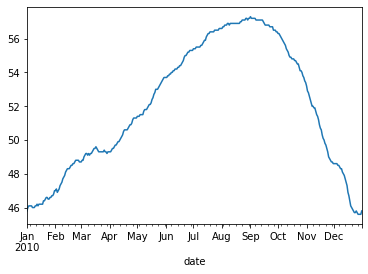

In [10]:
min_temps.temp.plot();

### 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
max_temps = temps.resample('D').max()

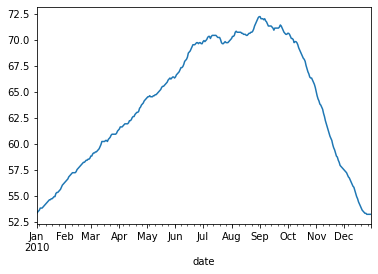

In [12]:
max_temps.temp.plot();

### 4. Which month is the coldest, on average?

In [21]:
month_temp_min = temps.resample('M').min()

In [25]:
month_temp_min[month_temp_min.temp == month_temp_min.temp.min()]

,temp,month
date,,
2010-12-31,45.6,12


### 5. Which month has the highest average temperature?

In [26]:
month_temp_max = temps.resample('M').max()

In [30]:
month_temp_max[month_temp_max.temp == month_temp_max.temp.max()]

,temp,month
date,,
2010-08-31,72.2,8
2010-09-30,72.2,9


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [89]:
min_max_day = temps.resample('D').temp.agg(['min', 'max'])
min_max_day['difference'] = min_max_day['max'] - min_max_day['min']

In [90]:
min_max_day

,min,max,difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [41]:
day_viz = temps.resample('D').temp.agg(['min', 'max', 'mean'])

In [42]:
day_viz

,min,max,mean
date,,,
2010-01-01,45.8,53.3,49.170833
2010-01-02,46.0,53.4,49.304167
2010-01-03,46.1,53.5,49.391667
2010-01-04,46.1,53.6,49.445833
2010-01-05,46.1,53.8,49.491667
...,...,...,...
2010-12-27,45.6,53.2,48.991667
2010-12-28,45.6,53.2,49.000000
2010-12-29,45.6,53.2,49.012500


<AxesSubplot:xlabel='date'>

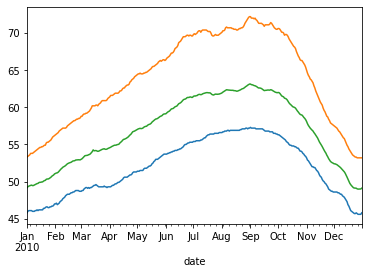

In [46]:
day_viz['min'].plot()
day_viz['max'].plot()
day_viz['mean'].plot()

## data.seattle_weather()

In [47]:
seattle_weather = data.seattle_weather()

In [49]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [55]:
seattle_weather = seattle_weather.set_index('date').sort_index()

### 1. Which year and month combination has the highest amount of precipitation?

In [64]:
max_precip = seattle_weather.resample('M').max()

In [78]:
max_precip[max_precip.precipitation.max()==max_precip.precipitation]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.9,20.6,10.6,5.7,sun


### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

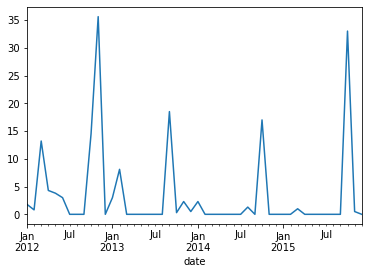

In [70]:
seattle_weather.asfreq('M').precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

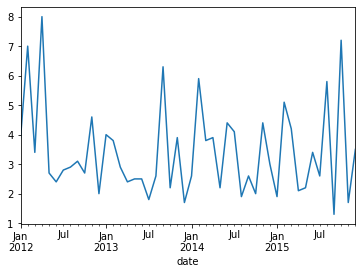

In [76]:
seattle_weather.asfreq('M').wind.plot()

### 4. Which year-month combination is the windiest?

In [77]:
max_precip[max_precip.wind.max()==max_precip.wind]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,22.6,13.3,8.3,9.5,sun


### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [94]:
seattle_weather[seattle_weather.weather=='sun']

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...
2015-12-13,1.3,7.8,6.1,6.1,sun
2015-12-14,0.0,7.8,1.7,1.7,sun
2015-12-26,0.0,4.4,0.0,2.5,sun


### 6. In which month does it rain the most?

In [ ]:
min_max_month = temps.resample('M').temp.agg(['min', 'max'])

### 7. Which month has the most number of days with a non-zero amount of precipitation?